VAMOS A PLANTEAR 2 CLUSTERS SIN INCLUIR LOS RESULTADOS COMO INCLUYENDO EL EXAMEN

##LIBRERIAS

In [1]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##SUBIR ARCHIVOS

In [2]:
# Ruta a la carpeta en tu Google Drive
folder_path = '/content/drive/MyDrive/ProyectoCoBios/Cuestionario_Clima_2023_Co_Depurado.xlsx'
df = pd.read_excel(folder_path,header=1)

In [3]:
df.head()

,Marca temporal,Código de la institución,1. Nombre de la institución,2. Tipo de Institución,3. Denominación de los servicios instituciones en salud,4. Área de trabajo.,5. Edad (años cumplidos),6. Sexo,7. Estado civil,8. Escolaridad,...,Equidad,Compromiso con la productividad,Compatibilidad de intereses,Intercambio de información,Involucración al cambio,LIDERAZGO,MOTIVACIÓN,RECIPROCIDAD,PARTICIPACIÓN,Id
0,2018-12-17 09:16:57.471,76001CML,Centro médico laboral,Privada,Baja Complejidad,Asistencial ambulatorio,30,Mujer,Casado,Técnico,...,3,5,4,1,3,3.75,4.00,4.00,3.25,0
1,2018-12-21 15:26:21.193,76001CML,Centro médico laboral,Privada,Baja Complejidad,Asistencial ambulatorio,27,Hombre,Soltero,Universitaria,...,3,5,5,4,4,4.75,4.75,3.50,4.50,1
2,2018-12-21 15:33:46.427,76001CML,Centro médico laboral,Privada,Baja Complejidad,Asistencial ambulatorio,21,Mujer,Soltero,Técnico,...,2,5,5,4,4,4.50,4.50,3.25,4.50,2
3,2018-12-21 15:46:42.083,76001CML,Centro médico laboral,Privada,Baja Complejidad,Apoyo operativo,22,Mujer,Soltero,Universitaria,...,4,5,4,3,3,4.50,4.50,3.75,3.75,3
4,2018-12-21 15:59:00.247,76001CML,Centro médico laboral,Privada,Baja Complejidad,Apoyo operativo,43,Mujer,Soltero,Secundaria,...,3,5,5,4,4,4.50,4.25,3.50,4.50,4


##PREPROCESO

In [4]:
### VERIFICAMOS SI HAY FILAS CON VALORES NULOS
# Verificar si existen valores nulos en el dataframe
NullRows = df.isnull().any(axis=1).any()

# Verificar si existen cadenas vacías en el dataframe
CleanRows = (df == '').any(axis=1).any()

print(NullRows,CleanRows)

False False


In [5]:
df

,Marca temporal,Código de la institución,1. Nombre de la institución,2. Tipo de Institución,3. Denominación de los servicios instituciones en salud,4. Área de trabajo.,5. Edad (años cumplidos),6. Sexo,7. Estado civil,8. Escolaridad,...,Equidad,Compromiso con la productividad,Compatibilidad de intereses,Intercambio de información,Involucración al cambio,LIDERAZGO,MOTIVACIÓN,RECIPROCIDAD,PARTICIPACIÓN,Id
0,2018-12-17 09:16:57.471,76001CML,Centro médico laboral,Privada,Baja Complejidad,Asistencial ambulatorio,30,Mujer,Casado,Técnico,...,3,5,4,1,3,3.75,4.00,4.00,3.25,0
1,2018-12-21 15:26:21.193,76001CML,Centro médico laboral,Privada,Baja Complejidad,Asistencial ambulatorio,27,Hombre,Soltero,Universitaria,...,3,5,5,4,4,4.75,4.75,3.50,4.50,1
2,2018-12-21 15:33:46.427,76001CML,Centro médico laboral,Privada,Baja Complejidad,Asistencial ambulatorio,21,Mujer,Soltero,Técnico,...,2,5,5,4,4,4.50,4.50,3.25,4.50,2
3,2018-12-21 15:46:42.083,76001CML,Centro médico laboral,Privada,Baja Complejidad,Apoyo operativo,22,Mujer,Soltero,Universitaria,...,4,5,4,3,3,4.50,4.50,3.75,3.75,3
4,2018-12-21 15:59:00.247,76001CML,Centro médico laboral,Privada,Baja Complejidad,Apoyo operativo,43,Mujer,Soltero,Secundaria,...,3,5,5,4,4,4.50,4.25,3.50,4.50,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,2018-10-24 06:58:23.530,17001VAI,VIVA 1A IPS LAURELES,Privada,Mediana complejidad,Asistencial ambulatorio,32,Hombre,Unión Libre,Técnico,...,2,4,2,2,5,3.25,3.25,3.50,3.25,2011
2012,2018-10-24 07:03:45.019,17001VAI,VIVA 1A IPS LAURELES,Privada,Mediana complejidad,Asistencial hospitalario,43,Mujer,Soltero,Universitaria,...,2,3,2,2,0,1.75,3.75,3.50,1.75,2012
2013,2018-10-24 07:18:15.790,17001VAI,VIVA 1A IPS LAURELES,Privada,Mediana complejidad,Apoyo operativo,29,Mujer,Soltero,Técnico,...,4,4,3,3,3,3.50,3.75,3.75,3.25,2013
2014,2018-10-24 07:23:00.046,17001VAI,VIVA 1A IPS LAURELES,Privada,Mediana complejidad,Asistencial hospitalario,37,Hombre,Unión Libre,Técnico,...,2,4,2,3,1,2.75,4.00,3.25,2.50,2014


In [6]:
CualitativesValues=[
#'Código de la institución  '
'1. Nombre de la institución '
,'2. Tipo de Institución '
,'3. Denominación de los servicios instituciones en salud '
,'4. Área de trabajo.'
,'5. Edad (años cumplidos)'
,'6. Sexo','7. Estado civil'
,'8. Escolaridad'
,'9. Termino de contratación'
,'10. Tipo de contrato',
'11. Horas laboradas cada día en la institución '
,'12. Tiempo Laborado en la institución'
,'13. Tiempo Laborado en su actual área o servicio'
,'14. Tiempo laborado en su actual cargo']

CualitativesValuesOneHot=[
'1. Nombre de la institución '
,'2. Tipo de Institución '
,'4. Área de trabajo.'
,'6. Sexo'
,'7. Estado civil'
,'9. Termino de contratación'
,'10. Tipo de contrato',
]
CualitativesValuesOneHotPrefix=[
'Nombre de la institución '
,'Tipo de Institución '
,'Área de trabajo.'
,'Sexo'
,'Estado civil'
,'Termino de contratación'
,'Tipo de contrato',
]

CualitativesValuesLabelEncoding=[
'3. Denominación de los servicios instituciones en salud ',
'8. Escolaridad',
'5. Edad (años cumplidos)',
'11. Horas laboradas cada día en la institución ',
'12. Tiempo Laborado en la institución',
'13. Tiempo Laborado en su actual área o servicio',
'14. Tiempo laborado en su actual cargo',
]

seleccionamos solo los atributos de entrada

In [7]:
df_filter_cualidades = df.iloc[:,2:16] ##SELECCIONAMOS TODAS LAS FILAS ## ELIMINAMOS LA FECHA Y EL CODIGO
df_filter_cualidades_new=pd.DataFrame(df_filter_cualidades)

In [8]:
df_filter_cualidades

,1. Nombre de la institución,2. Tipo de Institución,3. Denominación de los servicios instituciones en salud,4. Área de trabajo.,5. Edad (años cumplidos),6. Sexo,7. Estado civil,8. Escolaridad,9. Termino de contratación,10. Tipo de contrato,11. Horas laboradas cada día en la institución,12. Tiempo Laborado en la institución,13. Tiempo Laborado en su actual área o servicio,14. Tiempo laborado en su actual cargo
0,Centro médico laboral,Privada,Baja Complejidad,Asistencial ambulatorio,30,Mujer,Casado,Técnico,Término indefinido,Prestación de servicios,1–4 horas,De 1 a 5 años,De 1 a 5 años,De 1 a 5 años
1,Centro médico laboral,Privada,Baja Complejidad,Asistencial ambulatorio,27,Hombre,Soltero,Universitaria,Término indefinido,Por la institución,9-12 horas,De 1 a 5 años,De 1 a 5 años,De 1 a 5 años
2,Centro médico laboral,Privada,Baja Complejidad,Asistencial ambulatorio,21,Mujer,Soltero,Técnico,Término indefinido,Por la institución,5-8 horas,De 1 a 5 años,De 1 a 5 años,De 1 a 5 años
3,Centro médico laboral,Privada,Baja Complejidad,Apoyo operativo,22,Mujer,Soltero,Universitaria,Término indefinido,Por la institución,5-8 horas,De 1 a 5 años,De 1 a 5 años,De 1 a 5 años
4,Centro médico laboral,Privada,Baja Complejidad,Apoyo operativo,43,Mujer,Soltero,Secundaria,Término fijo,Por la institución,5-8 horas,De 1 a 5 años,De 1 a 5 años,De 1 a 5 años
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,VIVA 1A IPS LAURELES,Privada,Mediana complejidad,Asistencial ambulatorio,32,Hombre,Unión Libre,Técnico,Prestación de servicios,Por Cooperativa o asociación,5-8 horas,Menos de 1 año,Menos de 1 año,Menos de 1 año
2012,VIVA 1A IPS LAURELES,Privada,Mediana complejidad,Asistencial hospitalario,43,Mujer,Soltero,Universitaria,Término fijo,Por la institución,5-8 horas,Menos de 1 año,Menos de 1 año,Menos de 1 año
2013,VIVA 1A IPS LAURELES,Privada,Mediana complejidad,Apoyo operativo,29,Mujer,Soltero,Técnico,Término fijo,Por Cooperativa o asociación,5-8 horas,De 1 a 5 años,Menos de 1 año,Menos de 1 año
2014,VIVA 1A IPS LAURELES,Privada,Mediana complejidad,Asistencial hospitalario,37,Hombre,Unión Libre,Técnico,Término fijo,Por la institución,5-8 horas,De 1 a 5 años,De 1 a 5 años,De 1 a 5 años


ONE HOT

In [9]:
# Aplica la codificación one-hot

# Aplica one-hot encoding a las columnas 'genero', 'tipo_contrato' y 'estado_civil'
df_encoded = pd.get_dummies(df_filter_cualidades[CualitativesValuesOneHot], prefix=CualitativesValuesOneHotPrefix)
Arreglo = CualitativesValuesOneHot.copy()
# Concatena el DataFrame codificado con el DataFrame original
df_OneHot = pd.concat([df_filter_cualidades, df_encoded], axis=1)
df_OneHot.drop(Arreglo, axis=1, inplace=True)
df_OneHot

,3. Denominación de los servicios instituciones en salud,5. Edad (años cumplidos),8. Escolaridad,11. Horas laboradas cada día en la institución,12. Tiempo Laborado en la institución,13. Tiempo Laborado en su actual área o servicio,14. Tiempo laborado en su actual cargo,Nombre de la institución _CENTRO MEDICO POR SALUD,Nombre de la institución _CLINICA MARIANGEL TULUA,Nombre de la institución _CLINICA SAN JUAN DE DIOS DE MANIZALES,...,Estado civil_Unión Libre,Estado civil_Viudo,Termino de contratación_Prestación de servicios,Termino de contratación_Término fijo,Termino de contratación_Término indefinido,Tipo de contrato_Carrera administrativa,Tipo de contrato_Otra,Tipo de contrato_Por Cooperativa o asociación,Tipo de contrato_Por la institución,Tipo de contrato_Prestación de servicios
0,Baja Complejidad,30,Técnico,1–4 horas,De 1 a 5 años,De 1 a 5 años,De 1 a 5 años,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,Baja Complejidad,27,Universitaria,9-12 horas,De 1 a 5 años,De 1 a 5 años,De 1 a 5 años,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,Baja Complejidad,21,Técnico,5-8 horas,De 1 a 5 años,De 1 a 5 años,De 1 a 5 años,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,Baja Complejidad,22,Universitaria,5-8 horas,De 1 a 5 años,De 1 a 5 años,De 1 a 5 años,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,Baja Complejidad,43,Secundaria,5-8 horas,De 1 a 5 años,De 1 a 5 años,De 1 a 5 años,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,Mediana complejidad,32,Técnico,5-8 horas,Menos de 1 año,Menos de 1 año,Menos de 1 año,0,0,0,...,1,0,1,0,0,0,0,1,0,0
2012,Mediana complejidad,43,Universitaria,5-8 horas,Menos de 1 año,Menos de 1 año,Menos de 1 año,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2013,Mediana complejidad,29,Técnico,5-8 horas,De 1 a 5 años,Menos de 1 año,Menos de 1 año,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2014,Mediana complejidad,37,Técnico,5-8 horas,De 1 a 5 años,De 1 a 5 años,De 1 a 5 años,0,0,0,...,1,0,0,1,0,0,0,0,1,0


ORDINAL ENCODING

In [10]:
"""
APLICAMOS LABEL ENCODING A LAS VARIABLES QUE LO AMERITAN
"""
CualitativesValuesLabelEncoding=[
'3. Denominación de los servicios instituciones en salud ',
'8. Escolaridad',
'11. Horas laboradas cada día en la institución ',
'12. Tiempo Laborado en la institución',
'13. Tiempo Laborado en su actual área o servicio',
'14. Tiempo laborado en su actual cargo',
]

df_OneHot['Denominación de los servicios instituciones en salud_encoded'] = df_OneHot['3. Denominación de los servicios instituciones en salud '].map({'Alta complejidad': 2, 'Baja Complejidad': 0, 'Mediana complejidad':1})
df_OneHot['Escolaridad_encoded'] = df_OneHot['8. Escolaridad'].map({'Primaria': 0, 'Secundaria': 1,'Técnico':2,'Universitaria':3,'Posgrado':4})
df_OneHot['Horas laboradas_encoded'] = df_OneHot['11. Horas laboradas cada día en la institución '].map({'1–4 horas':0, '5-8 horas':1,'9-12 horas':2,'Más de 12 horas':3})
df_OneHot['Tiempo_institución_encoded'] = df_OneHot['12. Tiempo Laborado en la institución'].map({'De 1 a 5 años': 1, 'De 6 a 10 años': 2 ,'Menos de 1 año':0,'11 años o más':3})
df_OneHot['Tiempo_servicio_encoded'] = df_OneHot['13. Tiempo Laborado en su actual área o servicio'].map({'De 1 a 5 años': 1, 'De 6 a 10 años': 2 ,'Menos de 1 año':0,'11 años o más':3})
df_OneHot['Tiempo_actual_encoded'] = df_OneHot['14. Tiempo laborado en su actual cargo'].map({'De 1 a 5 años': 1, 'De 6 a 10 años': 2 ,'Menos de 1 año':0,'11 años o más':3})
df_OneHot.drop(CualitativesValuesLabelEncoding, axis=1, inplace=True)


df_filter_cualidades_new['Denominación de los servicios instituciones en salud_encoded'] = df_filter_cualidades['3. Denominación de los servicios instituciones en salud '].map({'Alta complejidad': 2, 'Baja Complejidad': 0, 'Mediana complejidad':1})
df_filter_cualidades_new['Escolaridad_encoded'] = df_filter_cualidades['8. Escolaridad'].map({'Primaria': 0, 'Secundaria': 1,'Técnico':2,'Universitaria':3,'Posgrado':4})
df_filter_cualidades_new['Horas laboradas_encoded'] = df_filter_cualidades['11. Horas laboradas cada día en la institución '].map({'1–4 horas':0, '5-8 horas':1,'9-12 horas':2,'Más de 12 horas':3})
df_filter_cualidades_new['Tiempo_institución_encoded'] = df_filter_cualidades['12. Tiempo Laborado en la institución'].map({'De 1 a 5 años': 1, 'De 6 a 10 años': 2 ,'Menos de 1 año':0,'11 años o más':3})
df_filter_cualidades_new['Tiempo_servicio_encoded'] = df_filter_cualidades['13. Tiempo Laborado en su actual área o servicio'].map({'De 1 a 5 años': 1, 'De 6 a 10 años': 2 ,'Menos de 1 año':0,'11 años o más':3})
df_filter_cualidades_new['Tiempo_actual_encoded'] = df_filter_cualidades['14. Tiempo laborado en su actual cargo'].map({'De 1 a 5 años': 1, 'De 6 a 10 años': 2 ,'Menos de 1 año':0,'11 años o más':3})
df_filter_cualidades_new.drop(CualitativesValuesLabelEncoding, axis=1, inplace=True)

In [11]:
df_OneHot

,5. Edad (años cumplidos),Nombre de la institución _CENTRO MEDICO POR SALUD,Nombre de la institución _CLINICA MARIANGEL TULUA,Nombre de la institución _CLINICA SAN JUAN DE DIOS DE MANIZALES,Nombre de la institución _CLINICA VERSALLES,Nombre de la institución _Centro médico laboral,Nombre de la institución _Christus sinergia Tuluá,Nombre de la institución _ESE CAMILO TRUJILLO SILVA,Nombre de la institución _ESE HOSPITAL LOCAL DE CANDELARIA,Nombre de la institución _ESE HOSPITAL MUNICIPAL ALGECIRAS,...,Tipo de contrato_Otra,Tipo de contrato_Por Cooperativa o asociación,Tipo de contrato_Por la institución,Tipo de contrato_Prestación de servicios,Denominación de los servicios instituciones en salud_encoded,Escolaridad_encoded,Horas laboradas_encoded,Tiempo_institución_encoded,Tiempo_servicio_encoded,Tiempo_actual_encoded
0,30,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,2,0,1,1,1
1,27,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,3,2,1,1,1
2,21,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,2,1,1,1,1
3,22,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,3,1,1,1,1
4,43,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,32,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,2,1,0,0,0
2012,43,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,3,1,0,0,0
2013,29,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,2,1,1,0,0
2014,37,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,2,1,1,1,1


definimos las salidas

In [12]:
##DEFINIMOS LAS SALIDAS
df_filter_values = df.iloc[:,-5:-1]
df_filter_values

,LIDERAZGO,MOTIVACIÓN,RECIPROCIDAD,PARTICIPACIÓN
0,3.75,4.00,4.00,3.25
1,4.75,4.75,3.50,4.50
2,4.50,4.50,3.25,4.50
3,4.50,4.50,3.75,3.75
4,4.50,4.25,3.50,4.50
...,...,...,...,...
2011,3.25,3.25,3.50,3.25
2012,1.75,3.75,3.50,1.75
2013,3.50,3.75,3.75,3.25
2014,2.75,4.00,3.25,2.50


In [13]:
df_OneHot_results=pd.concat([df_OneHot, df_filter_values], axis=1)
df_OneHot_results

,5. Edad (años cumplidos),Nombre de la institución _CENTRO MEDICO POR SALUD,Nombre de la institución _CLINICA MARIANGEL TULUA,Nombre de la institución _CLINICA SAN JUAN DE DIOS DE MANIZALES,Nombre de la institución _CLINICA VERSALLES,Nombre de la institución _Centro médico laboral,Nombre de la institución _Christus sinergia Tuluá,Nombre de la institución _ESE CAMILO TRUJILLO SILVA,Nombre de la institución _ESE HOSPITAL LOCAL DE CANDELARIA,Nombre de la institución _ESE HOSPITAL MUNICIPAL ALGECIRAS,...,Denominación de los servicios instituciones en salud_encoded,Escolaridad_encoded,Horas laboradas_encoded,Tiempo_institución_encoded,Tiempo_servicio_encoded,Tiempo_actual_encoded,LIDERAZGO,MOTIVACIÓN,RECIPROCIDAD,PARTICIPACIÓN
0,30,0,0,0,0,1,0,0,0,0,...,0,2,0,1,1,1,3.75,4.00,4.00,3.25
1,27,0,0,0,0,1,0,0,0,0,...,0,3,2,1,1,1,4.75,4.75,3.50,4.50
2,21,0,0,0,0,1,0,0,0,0,...,0,2,1,1,1,1,4.50,4.50,3.25,4.50
3,22,0,0,0,0,1,0,0,0,0,...,0,3,1,1,1,1,4.50,4.50,3.75,3.75
4,43,0,0,0,0,1,0,0,0,0,...,0,1,1,1,1,1,4.50,4.25,3.50,4.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,32,0,0,0,0,0,0,0,0,0,...,1,2,1,0,0,0,3.25,3.25,3.50,3.25
2012,43,0,0,0,0,0,0,0,0,0,...,1,3,1,0,0,0,1.75,3.75,3.50,1.75
2013,29,0,0,0,0,0,0,0,0,0,...,1,2,1,1,0,0,3.50,3.75,3.75,3.25
2014,37,0,0,0,0,0,0,0,0,0,...,1,2,1,1,1,1,2.75,4.00,3.25,2.50


##NO SUPERVISADO

##PCA

In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [15]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_OneHot_results)##MATRIZ EL DATAFRAME NORMALIZADO

In [16]:
pca = PCA(n_components=2)  # Especifica el número de componentes principales que deseas obtener
pca_result = pca.fit_transform(scaled_data)

In [17]:
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

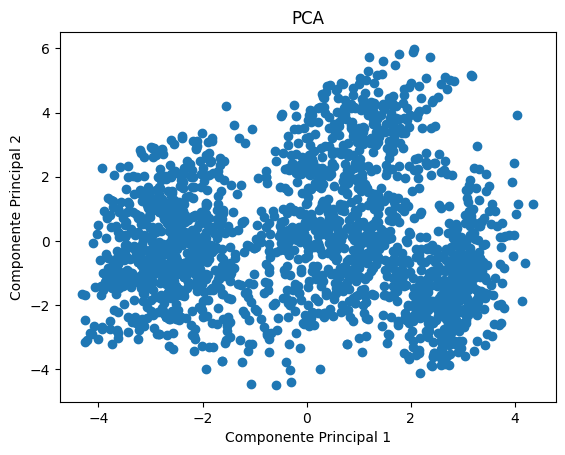

In [18]:
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA')
plt.show()

Se pueden llegar a visualizar 3 grupos pero no son muy definidos puede que sea posible considerarlos con procesos linealos probamos con procesos no lineales

##TSNE

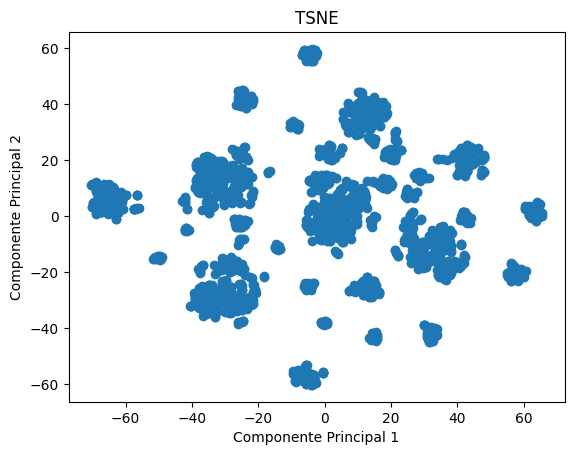

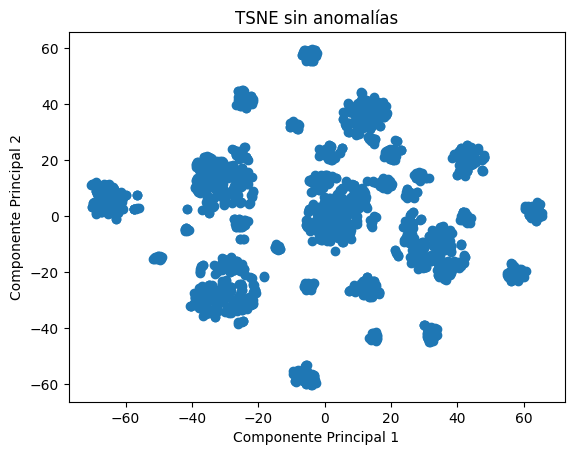

In [19]:
TSN = TSNE(n_components=2)  # Especifica el número de componentes principales que deseas obtener
TSN_result = TSN.fit_transform(scaled_data)
TSN_df = pd.DataFrame(data=TSN_result, columns=['PC1', 'PC2'])
plt.scatter(TSN_df['PC1'], TSN_df['PC2'])
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('TSNE')
plt.show()

"""
DETECTANDO ANOMALIAS
"""

# Crear instancia del algoritmo LOF
lof = LocalOutlierFactor(contamination='auto')  # 'auto' ajusta automáticamente el porcentaje de anomalías

# Detectar anomalías en los datos
outlier_scores = lof.fit_predict(TSN_df)

# Identificar los índices de los puntos anómalos
outliers_indices = np.where(outlier_scores == -1)[0]

# Eliminar los puntos anómalos del DataFrame
filtered_df = TSN_df.drop(outliers_indices)

# Graficar los puntos sin anomalías
plt.scatter(filtered_df['PC1'], filtered_df['PC2'])
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('TSNE sin anomalías')
plt.show()

##DEFINIMOS LOS CLUSTERS

ANALIZAMOS LA CANTIDAD DE CLUSTERS

##clase para metricas de rendimiento del cluster

In [20]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

class ClusterEvaluator:
    def __init__(self, data):
        self.data = data
    
    def evaluate_silhouette(self, labels):
        score = silhouette_score(self.data, labels)
        return score
    
    def evaluate_calinski_harabasz(self, labels):
        score = calinski_harabasz_score(self.data, labels)
        return score
    
    def evaluate_davies_bouldin(self, labels):
        score = davies_bouldin_score(self.data, labels)
        return score
    
    def evaluate_all(self, labels):
        silhouette = self.evaluate_silhouette(labels)
        calinski_harabasz = self.evaluate_calinski_harabasz(labels)
        davies_bouldin = self.evaluate_davies_bouldin(labels)
        return silhouette, calinski_harabasz, davies_bouldin

##ANALIZANDO CLUSTERS CLUSTERS

TSNE-CLUSTERS

##MIRAMOS GRAFICA DEL CODO

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

<Figure size 2000x2700 with 0 Axes>

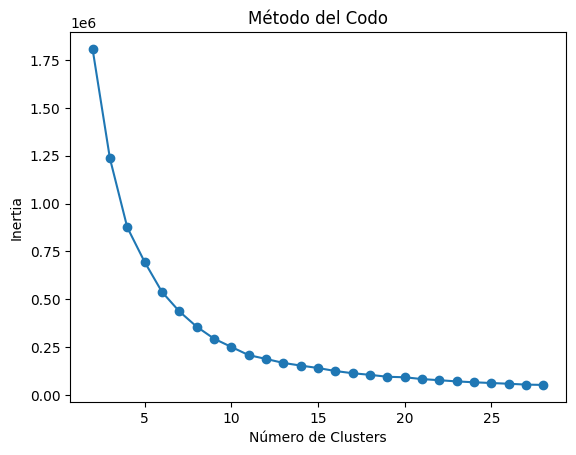

In [21]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def plot_kmeans_clusters(data, num_clusters, row, col, index):
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(data)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    inertia = kmeans.inertia_
    plt.subplot(row, col, index)
    plt.scatter(data['PC1'], data['PC2'], c=labels, cmap='viridis')
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', color='red', s=200)
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.title('Clustering con K-means (K={})\nInertia: {:.2f}'.format(num_clusters, inertia))

# Definir valores de clusters para generar las gráficas
num_clusters_values = [2,3, 4,5, 6, 7,8,9, 10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28]
num_plots = len(num_clusters_values)

# Calcular el número de filas y columnas necesarias para organizar las gráficas
rows = int(num_plots / 2) if num_plots % 2 == 0 else int(num_plots / 2) + 1
cols = 2

# Crear la figura y los subplots
fig = plt.figure(figsize=(20, 27))

inertias = []
for i, num_clusters in enumerate(num_clusters_values):
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(TSN_df)
    inertias.append(kmeans.inertia_)
    #plot_kmeans_clusters(TSN_df, num_clusters, rows, cols, i+1)

# Graficar el método del codo
plt.figure()
plt.plot(num_clusters_values, inertias, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inertia')
plt.title('Método del Codo')
plt.show()

ENTRE 5 Y 10 CLUSTERS TENEMOS LOS MEJORES CLUSTERS

##ANALIZAMOS LOS CLUSTERS

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

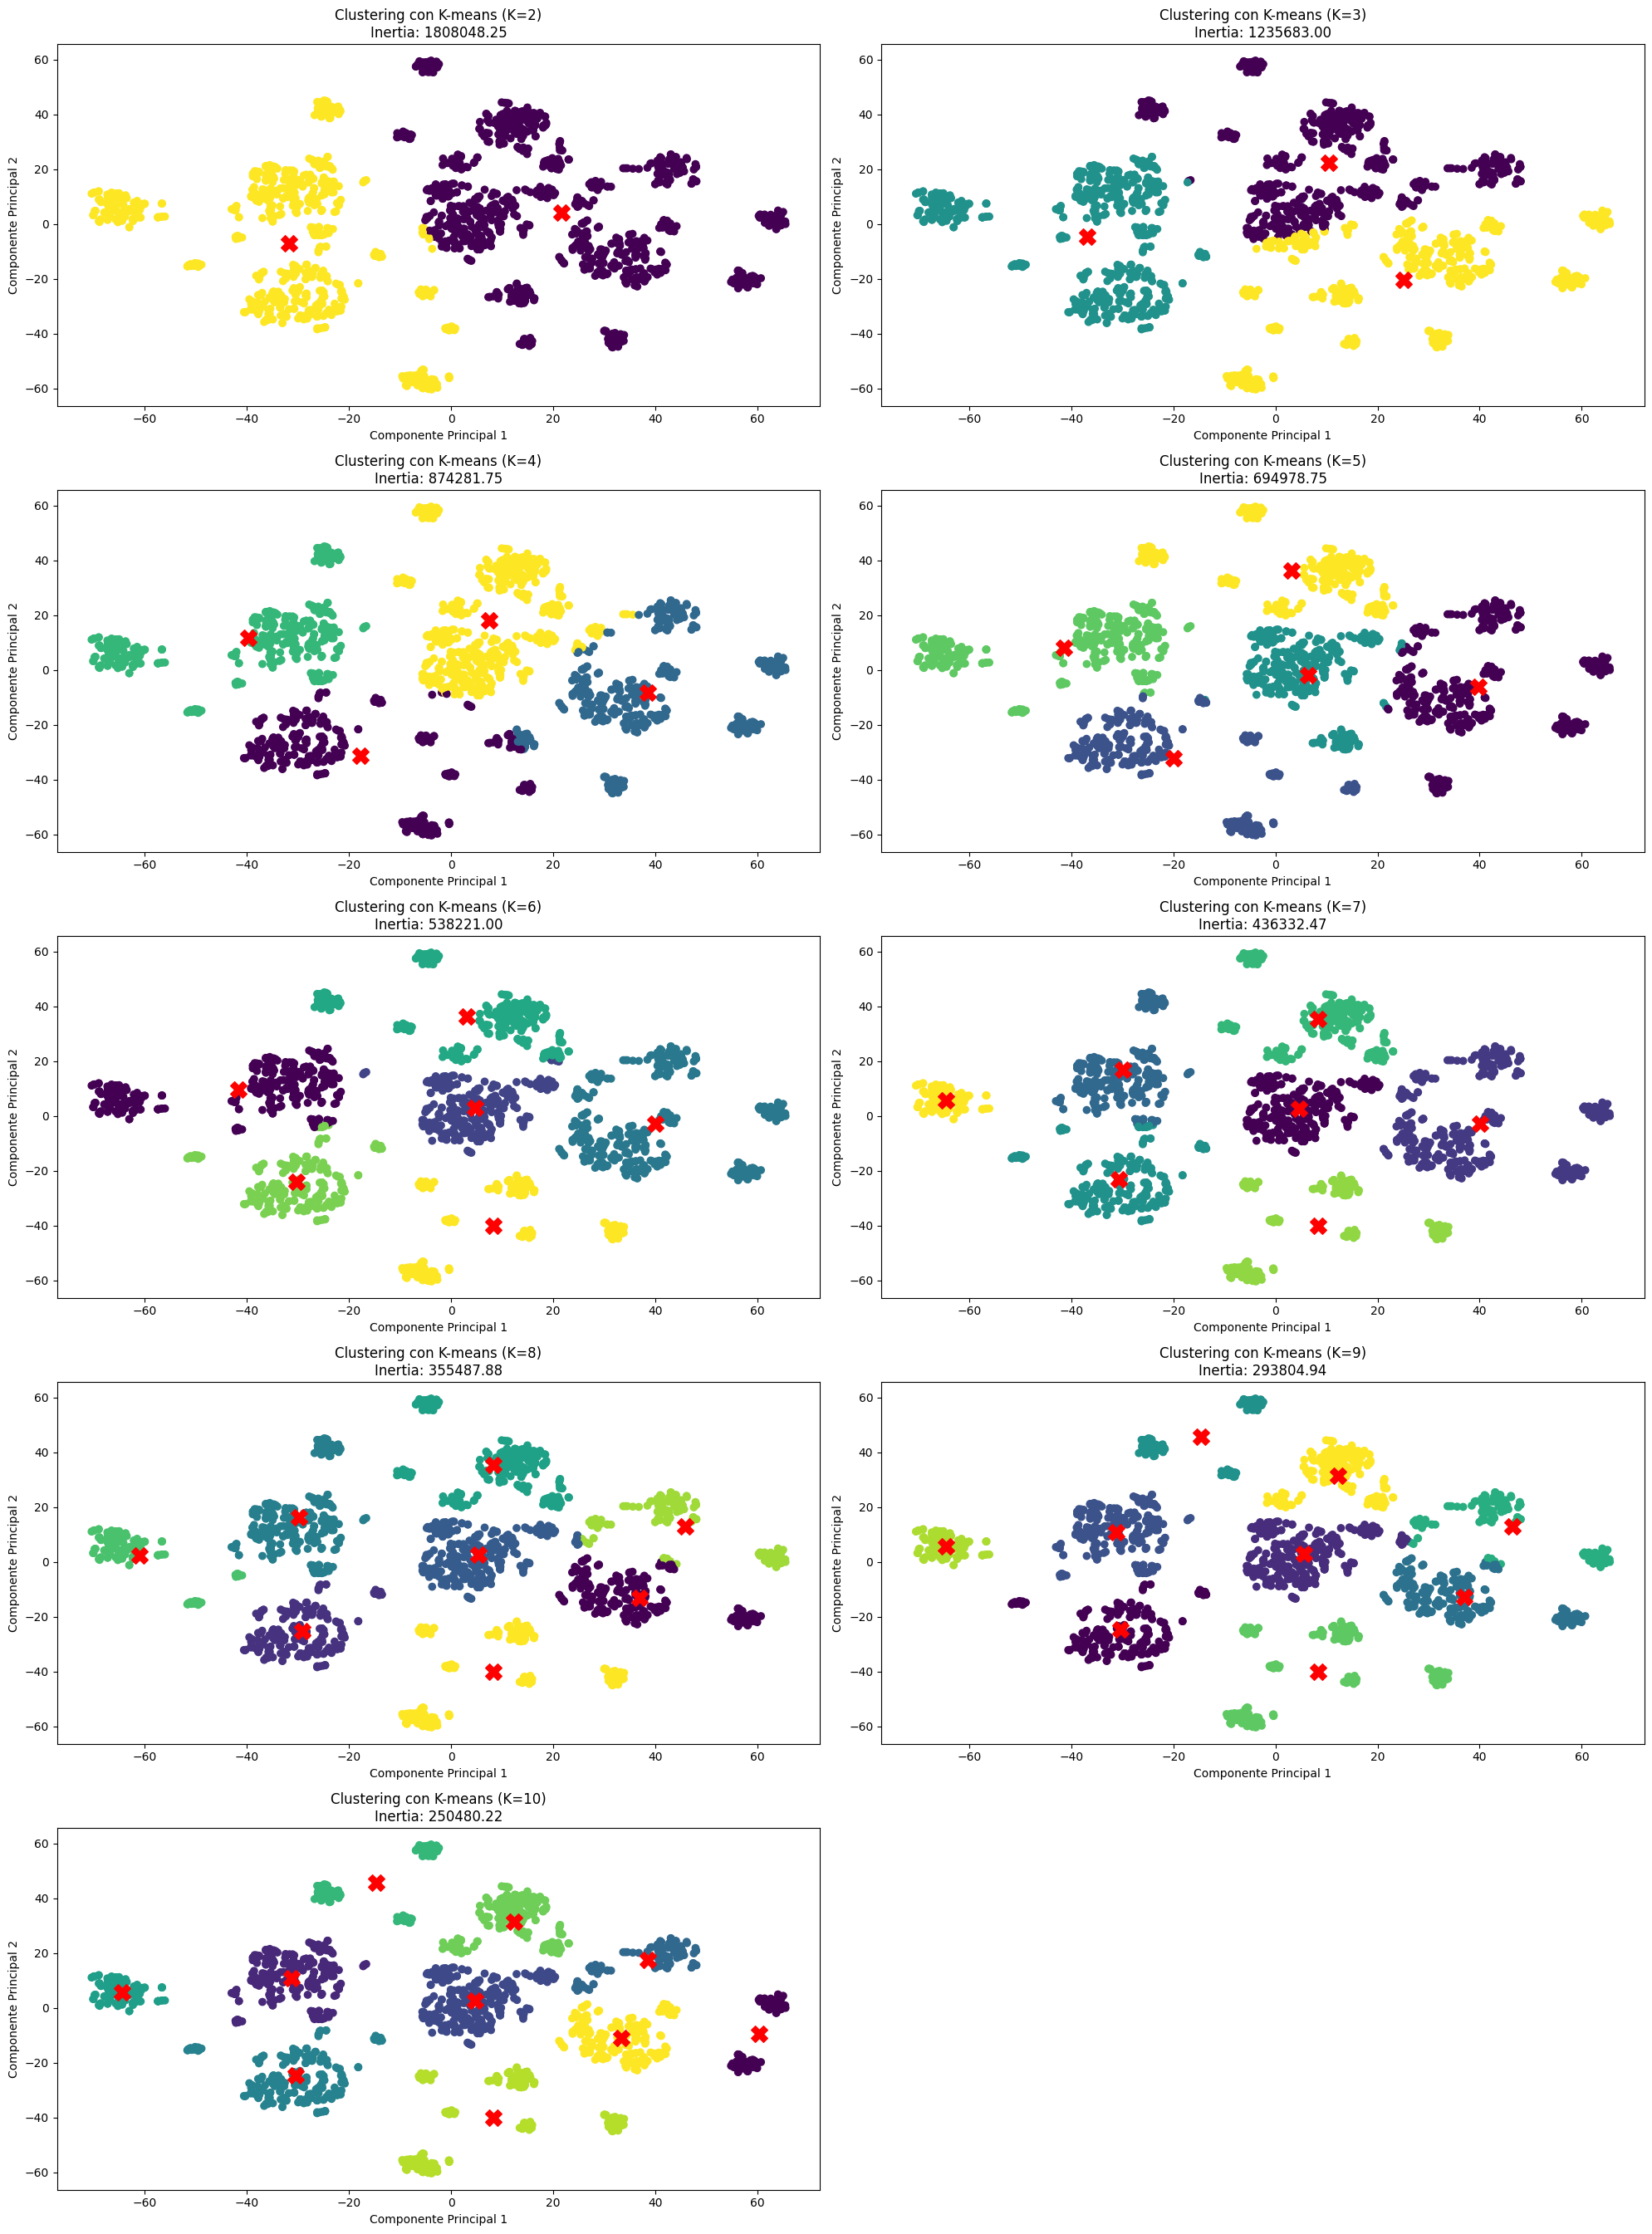

In [22]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def plot_kmeans_clusters(data, num_clusters, row, col, index):
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(data)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    inertia = kmeans.inertia_
    plt.subplot(row, col, index)
    plt.scatter(data['PC1'], data['PC2'], c=labels, cmap='viridis')
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', color='red', s=200)
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.title('Clustering con K-means (K={})\nInertia: {:.2f}'.format(num_clusters, inertia))

# Definir valores de clusters para generar las gráficas
num_clusters_values = [2,3, 4,5, 6, 7,8,9, 10]
num_plots = len(num_clusters_values)

# Calcular el número de filas y columnas necesarias para organizar las gráficas
rows = int(num_plots / 2) if num_plots % 2 == 0 else int(num_plots / 2) + 1
cols = 2

# Crear la figura y los subplots
fig = plt.figure(figsize=(20, 27))

inertias = []
changes = []
for i, num_clusters in enumerate(num_clusters_values):
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(TSN_df)
    inertias.append(kmeans.inertia_)
    
    if i > 0:
        change = inertias[i-1] - inertias[i]
        changes.append(change)
    else:
        changes.append(0)
    
    plot_kmeans_clusters(TSN_df, num_clusters, rows, cols, i+1)
plt.tight_layout()
plt.show()

cambios de inertia

In [23]:
# Crear la tabla de valores de Inertia y cambios
table_data = {
    'Número de Clusters': num_clusters_values,
    'Inertia': inertias,
    'Cambio': changes
}
data_inertial = pd.DataFrame(table_data)

print(data_inertial )

   Número de Clusters       Inertia        Cambio
0                   2  1.808048e+06       0.00000
1                   3  1.235881e+06  572167.62500
2                   4  8.742756e+05  361605.00000
3                   5  7.032398e+05  171035.87500
4                   6  5.385269e+05  164712.81250
5                   7  4.363412e+05  102185.68750
6                   8  3.550946e+05   81246.68750
7                   9  2.938216e+05   61273.00000
8                  10  2.504802e+05   43341.34375


##SELECCIONAMOS 7 CLUSTER PARA EL ANALISIS

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


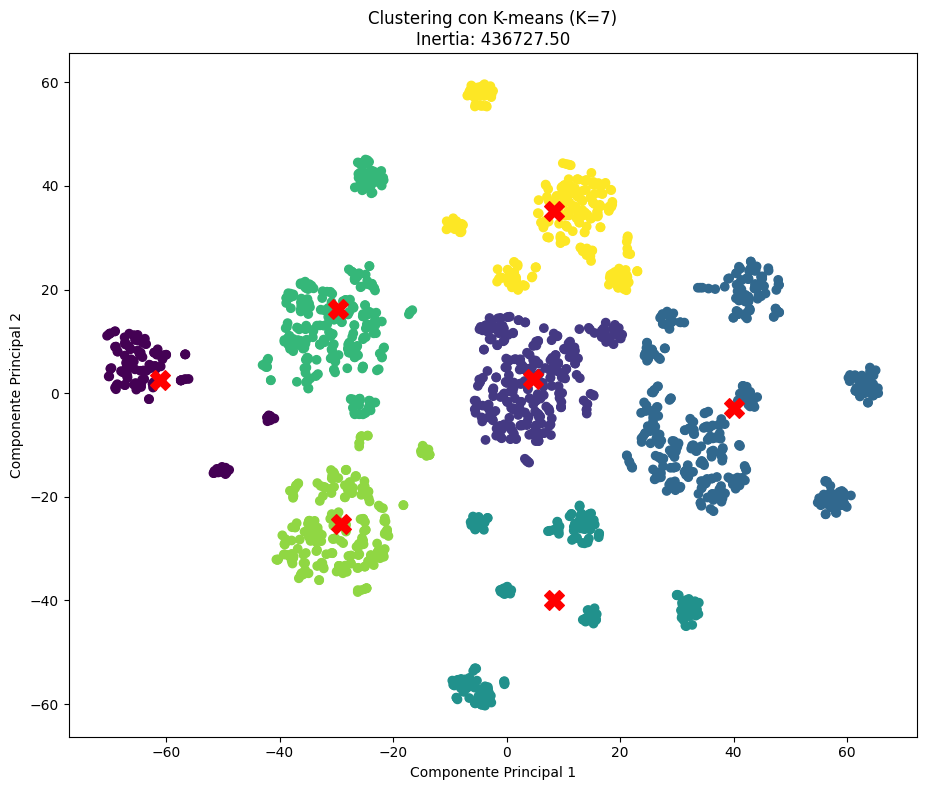

In [39]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def plot_kmeans_clusters(data, num_clusters, row, col, index):
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(data)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    inertia = kmeans.inertia_
    plt.subplot(row, col, index)
    plt.scatter(data['PC1'], data['PC2'], c=labels, cmap='viridis')
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', color='red', s=200)
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.title('Clustering con K-means (K={})\nInertia: {:.2f}'.format(num_clusters, inertia))
    return labels ,kmeans

# Definir valores de clusters para generar las gráficas
num_clusters_values = [7]
num_plots = len(num_clusters_values)

# Calcular el número de filas y columnas necesarias para organizar las gráficas
rows = int(num_plots / 2) if num_plots % 2 == 0 else int(num_plots / 2) + 1
cols = 2

# Crear la figura y los subplots
fig = plt.figure(figsize=(18, 8))
for i, num_clusters in enumerate(num_clusters_values):
    labels,modelKmeans=plot_kmeans_clusters(TSN_df, num_clusters, rows, cols, i+1)
plt.tight_layout()
plt.show()

##GENERAMOS UN MODELO QUE ME CLASIFIQUE UN NUEVO EJEMPLAR EN ALGUN GRUPO DETERMINADO Y VEMOS CARACTERISTICAS DE CADA UNO

Tomamos la base de datos inicial

In [40]:
df_original=pd.concat([df.iloc[:,2:16], df_filter_values], axis=1) ##SELECCIONAMOS TODAS LAS FILAS ## ELIMINAMOS LA FECHA Y EL CODIGO
df_original

,1. Nombre de la institución,2. Tipo de Institución,3. Denominación de los servicios instituciones en salud,4. Área de trabajo.,5. Edad (años cumplidos),6. Sexo,7. Estado civil,8. Escolaridad,9. Termino de contratación,10. Tipo de contrato,11. Horas laboradas cada día en la institución,12. Tiempo Laborado en la institución,13. Tiempo Laborado en su actual área o servicio,14. Tiempo laborado en su actual cargo,LIDERAZGO,MOTIVACIÓN,RECIPROCIDAD,PARTICIPACIÓN
0,Centro médico laboral,Privada,Baja Complejidad,Asistencial ambulatorio,30,Mujer,Casado,Técnico,Término indefinido,Prestación de servicios,1–4 horas,De 1 a 5 años,De 1 a 5 años,De 1 a 5 años,3.75,4.00,4.00,3.25
1,Centro médico laboral,Privada,Baja Complejidad,Asistencial ambulatorio,27,Hombre,Soltero,Universitaria,Término indefinido,Por la institución,9-12 horas,De 1 a 5 años,De 1 a 5 años,De 1 a 5 años,4.75,4.75,3.50,4.50
2,Centro médico laboral,Privada,Baja Complejidad,Asistencial ambulatorio,21,Mujer,Soltero,Técnico,Término indefinido,Por la institución,5-8 horas,De 1 a 5 años,De 1 a 5 años,De 1 a 5 años,4.50,4.50,3.25,4.50
3,Centro médico laboral,Privada,Baja Complejidad,Apoyo operativo,22,Mujer,Soltero,Universitaria,Término indefinido,Por la institución,5-8 horas,De 1 a 5 años,De 1 a 5 años,De 1 a 5 años,4.50,4.50,3.75,3.75
4,Centro médico laboral,Privada,Baja Complejidad,Apoyo operativo,43,Mujer,Soltero,Secundaria,Término fijo,Por la institución,5-8 horas,De 1 a 5 años,De 1 a 5 años,De 1 a 5 años,4.50,4.25,3.50,4.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,VIVA 1A IPS LAURELES,Privada,Mediana complejidad,Asistencial ambulatorio,32,Hombre,Unión Libre,Técnico,Prestación de servicios,Por Cooperativa o asociación,5-8 horas,Menos de 1 año,Menos de 1 año,Menos de 1 año,3.25,3.25,3.50,3.25
2012,VIVA 1A IPS LAURELES,Privada,Mediana complejidad,Asistencial hospitalario,43,Mujer,Soltero,Universitaria,Término fijo,Por la institución,5-8 horas,Menos de 1 año,Menos de 1 año,Menos de 1 año,1.75,3.75,3.50,1.75
2013,VIVA 1A IPS LAURELES,Privada,Mediana complejidad,Apoyo operativo,29,Mujer,Soltero,Técnico,Término fijo,Por Cooperativa o asociación,5-8 horas,De 1 a 5 años,Menos de 1 año,Menos de 1 año,3.50,3.75,3.75,3.25
2014,VIVA 1A IPS LAURELES,Privada,Mediana complejidad,Asistencial hospitalario,37,Hombre,Unión Libre,Técnico,Término fijo,Por la institución,5-8 horas,De 1 a 5 años,De 1 a 5 años,De 1 a 5 años,2.75,4.00,3.25,2.50


In [41]:
df_original['Cluster']=labels
df_original

,1. Nombre de la institución,2. Tipo de Institución,3. Denominación de los servicios instituciones en salud,4. Área de trabajo.,5. Edad (años cumplidos),6. Sexo,7. Estado civil,8. Escolaridad,9. Termino de contratación,10. Tipo de contrato,11. Horas laboradas cada día en la institución,12. Tiempo Laborado en la institución,13. Tiempo Laborado en su actual área o servicio,14. Tiempo laborado en su actual cargo,LIDERAZGO,MOTIVACIÓN,RECIPROCIDAD,PARTICIPACIÓN,Cluster
0,Centro médico laboral,Privada,Baja Complejidad,Asistencial ambulatorio,30,Mujer,Casado,Técnico,Término indefinido,Prestación de servicios,1–4 horas,De 1 a 5 años,De 1 a 5 años,De 1 a 5 años,3.75,4.00,4.00,3.25,0
1,Centro médico laboral,Privada,Baja Complejidad,Asistencial ambulatorio,27,Hombre,Soltero,Universitaria,Término indefinido,Por la institución,9-12 horas,De 1 a 5 años,De 1 a 5 años,De 1 a 5 años,4.75,4.75,3.50,4.50,0
2,Centro médico laboral,Privada,Baja Complejidad,Asistencial ambulatorio,21,Mujer,Soltero,Técnico,Término indefinido,Por la institución,5-8 horas,De 1 a 5 años,De 1 a 5 años,De 1 a 5 años,4.50,4.50,3.25,4.50,0
3,Centro médico laboral,Privada,Baja Complejidad,Apoyo operativo,22,Mujer,Soltero,Universitaria,Término indefinido,Por la institución,5-8 horas,De 1 a 5 años,De 1 a 5 años,De 1 a 5 años,4.50,4.50,3.75,3.75,0
4,Centro médico laboral,Privada,Baja Complejidad,Apoyo operativo,43,Mujer,Soltero,Secundaria,Término fijo,Por la institución,5-8 horas,De 1 a 5 años,De 1 a 5 años,De 1 a 5 años,4.50,4.25,3.50,4.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,VIVA 1A IPS LAURELES,Privada,Mediana complejidad,Asistencial ambulatorio,32,Hombre,Unión Libre,Técnico,Prestación de servicios,Por Cooperativa o asociación,5-8 horas,Menos de 1 año,Menos de 1 año,Menos de 1 año,3.25,3.25,3.50,3.25,3
2012,VIVA 1A IPS LAURELES,Privada,Mediana complejidad,Asistencial hospitalario,43,Mujer,Soltero,Universitaria,Término fijo,Por la institución,5-8 horas,Menos de 1 año,Menos de 1 año,Menos de 1 año,1.75,3.75,3.50,1.75,3
2013,VIVA 1A IPS LAURELES,Privada,Mediana complejidad,Apoyo operativo,29,Mujer,Soltero,Técnico,Término fijo,Por Cooperativa o asociación,5-8 horas,De 1 a 5 años,Menos de 1 año,Menos de 1 año,3.50,3.75,3.75,3.25,3
2014,VIVA 1A IPS LAURELES,Privada,Mediana complejidad,Asistencial hospitalario,37,Hombre,Unión Libre,Técnico,Término fijo,Por la institución,5-8 horas,De 1 a 5 años,De 1 a 5 años,De 1 a 5 años,2.75,4.00,3.25,2.50,3


separamos la data segun cada categoria

In [42]:
# Crear tres DataFrames separados para cada grupo de cluster
dataframes = []
for label in range(7):  # Cambia el valor 3 por el número real de clusters que tienes
    cluster_data = df_original[df_original['Cluster'] == label]
    dataframes.append(cluster_data)

In [44]:
# Acceder al primer DataFrame correspondiente al primer grupo de cluster
df_cluster_1 = dataframes[0]

# Acceder al segundo DataFrame correspondiente al segundo grupo de cluster
df_cluster_2 = dataframes[1]

# Acceder al tercer DataFrame correspondiente al tercer grupo de cluster
df_cluster_3 = dataframes[2]

# Acceder al primer DataFrame correspondiente al primer grupo de cluster
df_cluster_4 = dataframes[3]

# Acceder al segundo DataFrame correspondiente al segundo grupo de cluster
df_cluster_5 = dataframes[4]

# Acceder al tercer DataFrame correspondiente al tercer grupo de cluster
df_cluster_6 = dataframes[5]
# Acceder al primer DataFrame correspondiente al primer grupo de cluster
df_cluster_7 = dataframes[6]

In [29]:
df_cluster_1

,1. Nombre de la institución,2. Tipo de Institución,3. Denominación de los servicios instituciones en salud,4. Área de trabajo.,5. Edad (años cumplidos),6. Sexo,7. Estado civil,8. Escolaridad,9. Termino de contratación,10. Tipo de contrato,11. Horas laboradas cada día en la institución,12. Tiempo Laborado en la institución,13. Tiempo Laborado en su actual área o servicio,14. Tiempo laborado en su actual cargo,LIDERAZGO,MOTIVACIÓN,RECIPROCIDAD,PARTICIPACIÓN,Cluster
45,Christus sinergia Tuluá,Privada,Baja Complejidad,Asistencial ambulatorio,41,Mujer,Viudo,Universitaria,Término indefinido,Por la institución,9-12 horas,11 años o más,De 6 a 10 años,De 6 a 10 años,4.25,3.25,3.00,3.75,0
128,CLINICA SAN JUAN DE DIOS DE MANIZALES,Privada,Mediana complejidad,Asistencial hospitalario,27,Mujer,Viudo,Técnico,Término fijo,Por la institución,5-8 horas,De 1 a 5 años,De 1 a 5 años,De 1 a 5 años,4.00,4.25,2.75,3.25,0
219,CLINICA SAN JUAN DE DIOS DE MANIZALES,Privada,Mediana complejidad,Apoyo diagnostico y terapéutico,30,Mujer,Viudo,Técnico,Término fijo,Por la institución,5-8 horas,De 1 a 5 años,De 1 a 5 años,De 1 a 5 años,4.25,3.50,3.25,3.25,0
220,CLINICA VERSALLES,Privada,Mediana complejidad,Asistencial hospitalario,12,Mujer,Viudo,Técnico,Término indefinido,Por la institución,9-12 horas,11 años o más,Menos de 1 año,11 años o más,4.75,3.75,3.50,3.75,0
477,CLINICA VERSALLES,Privada,Mediana complejidad,Asistencial hospitalario,47,Hombre,Viudo,Universitaria,Término fijo,Por la institución,5-8 horas,De 1 a 5 años,De 1 a 5 años,De 1 a 5 años,2.75,2.25,3.00,2.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1802,HOSPITAL FRANCISCO DE PAULA SANTANDER ESE,Publica,Mediana complejidad,Asistencial hospitalario,33,Mujer,Separado,Técnico,Prestación de servicios,Prestación de servicios,9-12 horas,De 1 a 5 años,De 1 a 5 años,De 1 a 5 años,2.00,2.00,2.75,2.75,0
1803,HOSPITAL FRANCISCO DE PAULA SANTANDER ESE,Publica,Mediana complejidad,Asistencial hospitalario,35,Mujer,Unión Libre,Técnico,Término indefinido,Por Cooperativa o asociación,9-12 horas,De 1 a 5 años,De 1 a 5 años,De 1 a 5 años,2.50,3.25,3.25,2.75,0
1804,HOSPITAL FRANCISCO DE PAULA SANTANDER ESE,Publica,Mediana complejidad,Asistencial hospitalario,38,Hombre,Unión Libre,Técnico,Término fijo,Por Cooperativa o asociación,9-12 horas,De 6 a 10 años,De 6 a 10 años,De 6 a 10 años,3.00,2.25,2.75,2.75,0
1805,HOSPITAL FRANCISCO DE PAULA SANTANDER ESE,Publica,Mediana complejidad,Asistencial hospitalario,27,Mujer,Soltero,Universitaria,Término fijo,Por Cooperativa o asociación,9-12 horas,De 1 a 5 años,De 1 a 5 años,De 1 a 5 años,3.25,3.75,3.25,2.75,0


In [30]:
!pip install explainerdashboard==0.4.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.8/277.8 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.6/220.6 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 117.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.5/91.5 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 46.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.5/136.5 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 82.4 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 2.3.0
    Uninstalli

In [31]:
from explainerdashboard import ClassifierExplainer, ExplainerDashboard

##GENERANDO INFORMES PARA CADA GRUPO

In [36]:
!pip install pandas_profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pandas_profiling-3.6.6-py2.py3-none-any.whl (324 kB)
  Using cached ydata_profiling-4.2.0-py2.py3-none-any.whl (352 kB)
  Using cached visions-0.7.5-py3-none-any.whl (102 kB)
  Using cached htmlmin-0.1.12.tar.gz (19 kB)
  Preparing metadata (setup.py) ... done
  Using cached phik-0.12.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (679 kB)
  Using cached multimethod-1.9.1-py3-none-any.whl (10 kB)
  Using cached typeguard-2.13.3-py3-none-any.whl (17 kB)
  Using cached ImageHash-4.3.1-py2.py3-none-any.whl (296 kB)
  Using cached wordcloud-1.9.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (455 kB)
  Using cached dacite-1.8.1-py3-none-any.whl (14 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 53.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=56a283d0a5459c358a500ec8c170e462f62

In [37]:
import pandas_profiling

<ipython-input-37-6a00893fb3e1>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.


comentamos estas lineas en caso de descomentar es para generar el informe de cada grupo

In [38]:
# Genera el informe descriptivo
report = df_cluster_7.profile_report()

# Muestra el informe en un navegador
report.to_file("informe_grupo7.html")

/usr/local/lib/python3.10/dist-packages/multimethod/__init__.py:315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

##GENERANDO POR ULTIMO EL MODELO PARA CLASIFICAR DENTRO DE LOS GRUPOS SELECCIONADOS

In [45]:
modelKmeans

KMeans(n_clusters=7)

Guardamos el modelo

In [46]:
import joblib

In [47]:
joblib.dump(modelKmeans, '/content/drive/MyDrive/ModelosCO/modelo_kmeans.pkl')

['/content/drive/MyDrive/ModelosCO/modelo_kmeans.pkl']

Probamos el modelo cargado

In [48]:
modelo_kmeans = joblib.load('/content/drive/MyDrive/ModelosCO/modelo_kmeans.pkl')